# COMP5329_Assignment1

## 1. Import Necessary Libraries

In [332]:
import numpy as np
import os

## 2. Data pre-processing

2.1 Set path, Load data and Split data.

2.2 One-hot Encoding and Standardization

2.3 Print results to vertify the pre-processing

In [336]:
class Data:
    # 2.1 Set path, Load data and Split data.
    
    def __init__(self, path="Assignment1-Dataset", split_rate=0.8):
        # Set path
        os_path = os.getcwd()
        train_data_path = os.path.join(os_path, path, 'train_data.npy')
        train_label_path = os.path.join(os_path, path, 'train_label.npy')
        test_data_path = os.path.join(os_path, path, 'test_data.npy')
        test_label_path = os.path.join(os_path, path, 'test_label.npy')

        # Load data
        X = np.load(train_data_path)
        y = np.load(train_label_path).flatten()

        # Split the data
        self.train_data, self.val_data, self.train_label, self.val_label = self.train_validation_split(X, y, split_rate)

    # 2.2 One-hot Encoding and Standardization
        # Standardize the feature data
        self.train_data = self.standardization(self.train_data)
        self.val_data = self.standardization(self.val_data)
        self.test_data = self.standardization(np.load(test_data_path))

        # One-hot encode the labels
        self.train_label = self.one_hot(self.train_label)
        self.val_label = self.one_hot(self.val_label)
        self.test_label = self.one_hot(np.load(test_label_path).flatten())

    def one_hot(self, labels):
        n_classes = np.max(labels) + 1
        return np.eye(n_classes)[labels]

    def standardization(self, data):
        mean = np.mean(data, axis=0)
        std = np.std(data, axis=0)
        return (data - mean) / std

    def train_validation_split(self, data, labels, split_rate):
        split_index = int(len(data) * split_rate)
        return data[:split_index], data[split_index:], labels[:split_index], labels[split_index:]

# Create an instance of the Data class
data_loader = Data()  

# 2.3 Print results to vertify the pre-processing

# Data shape verification
print("Train data shape:", data_loader.train_data.shape)
print("Validation data shape:", data_loader.val_data.shape)
print("Test data shape:", data_loader.test_data.shape)

# Label shape verification
print("Train labels shape:", data_loader.train_label.shape)
print("Validation labels shape:", data_loader.val_label.shape)
print("Test labels shape:", data_loader.test_label.shape)

# Print a sample of the training data and labels to verify preprocessing
print("Sample train data:", data_loader.train_data[:5])
print("Sample train labels:", data_loader.train_label[:5])

# Verify unique label vectors for one-hot encoding correctness
print("Unique label vectors:", np.unique(data_loader.train_label, axis=0))

# Verify the mean and standard deviation of the standardized training data
print("Mean of standardized train data:", np.mean(data_loader.train_data))
print("Standard deviation of standardized train data:", np.std(data_loader.train_data))


Train data shape: (40000, 128)
Validation data shape: (10000, 128)
Test data shape: (10000, 128)
Train labels shape: (40000, 10)
Validation labels shape: (10000, 10)
Test labels shape: (10000, 10)
Sample train data: [[-8.59286884e-01  5.89029437e-01  4.24391051e-01 -1.11216815e+00
  -1.69618020e+00  2.78521791e-01  2.47859427e-01  4.56475415e-02
   1.74700756e+00  7.04297190e-01  2.61792942e-01 -1.11479585e-02
   2.55218719e-01  2.97413752e-01 -4.21889825e-01 -5.29275304e-01
  -4.51070357e-01  2.89834892e-01  5.94253647e-01 -5.17565475e-01
  -8.85463336e-01 -1.20751100e+00  6.37194185e-01 -8.35475265e-01
  -1.36251440e+00  9.42351365e-01 -4.85151022e-02  1.51551972e+00
  -1.08744396e+00  1.75278186e-01 -2.15944654e-01 -3.07938624e-02
  -1.16778313e+00  7.18108056e-01  2.25866420e+00 -3.69549357e-01
   5.05650793e-01 -6.98697602e-01  1.39095303e+00 -5.17348370e-01
   6.56477229e-01 -1.08557852e+00 -3.18037942e-01 -3.02600777e-01
  -3.93417256e-01 -8.37021100e-02  1.11045005e-01 -5.70183

## 3. MPL

In [337]:
# Linear layer with momentum and weight decay
class LinearLayer:
    def __init__(self, n_in, n_out):
        self.W = np.random.uniform(-np.sqrt(6. / (n_in + n_out)), np.sqrt(6. / (n_in + n_out)), (n_in, n_out))
        self.b = np.zeros(n_out)
        self.v_W = np.zeros_like(self.W)
        self.v_b = np.zeros_like(self.b)
        self.input = None

        # Gradients
        self.dw = None
        self.db = None

    def forward(self, input):
        self.input = input
        return np.dot(input, self.W) + self.b

    def backward(self, grad_output):

        # Compute gradients with respect to weights and biases
        self.dw = np.dot(self.input.T, grad_output)
        self.db = np.sum(grad_output, axis=0, keepdims=True)
        return np.dot(grad_output, self.W.T)
    
    def get_params(self):
        return {'w': self.W, 'b': self.b}

    def get_grads(self):
        return {'dw': self.dw, 'db': self.db}

    def update(self, lr, momentum, weight_decay):
        # Update weights and biases using SGD with momentum and L2 regularization
        self.v_W = momentum * self.v_W - lr * (self.grad_W + weight_decay * self.W)
        self.v_b = momentum * self.v_b - lr * (self.grad_b + weight_decay * self.b)
        self.W += self.v_W
        self.b += self.v_b


In [338]:
class Network(object):
    def __init__(self):
        """
        Initialize the network
        layers: Stores all layers of the network
        """
        self.layers = []
    
    def add_layer(self, layer):
        """
        Add a new layer to the network
        """
        self.layers.append(layer)
    
    def forward(self, x):
        """
        Forward propagation
        Args:
            x: Input data
        Returns:
            output: Network output (after softmax)
        """
        output = x
        for layer in self.layers:
            output = layer.forward(output)
        return self.softmax(output)
    
    def backward(self, grad_output):
        """
        Backpropagation
        Args:
            grad_output: Gradient from the final layer
            learning_rate: Learning rate
        """
        grad = grad_output
        for layer in reversed(self.layers):
            grad = layer.backward(grad)

        
    def softmax(self, x):
        """
        Softmax function
        According to https://en.wikipedia.org/wiki/Softmax_function
        f(x) = exp(x) / sum(exp(x))
        """
        return np.exp(x - np.max(x, axis=1, keepdims=True)) \
               / np.sum(np.exp(x - np.max(x, axis=1, keepdims=True)), 
                       axis=1, keepdims=True)
    
    def _softmax_deriv(self, y, y_pred):
        """
        Derivative of softmax function, combined with cross entropy loss function.
        According to https://deepnotes.io/softmax-crossentropy
        f'(x) = y_pred - y
        """
        return y_pred - y
    
    def criterion_cross_entropy(self, y, y_hat):
        """
        Compute cross-entropy loss
        Args:
            y: True labels (batch_size * n_class)
            y_hat: Model predictions (batch_size * n_class)
        Returns:
            loss: Loss value
            delta: Gradient
        """
        batch_size = y.shape[0]
        y_hat = np.clip(y_hat, 1e-12, 1-1e-12)
        loss = -np.sum(np.multiply(y, np.log(y_hat))) / batch_size
        delta = self._softmax_deriv(y, y_hat)
        return loss, delta

    def predict(self, x):
        """
        Prediction function
        Args:
            x: Input data
        Returns:
            Predicted output
        """
        return self.forward(x)
    
    def evaluate(self, X, y):
        """
        Evaluation function
        Args:
            X: Test feature data
            y: True labels (one-hot encoded)
        Returns:
            acc: Accuracy
        """
        predictions = self.predict(X)
        predictions = np.argmax(predictions, axis=1)
        y_true = np.argmax(y, axis=1)
        accuracy = np.sum(predictions == y_true) / len(y)
        return accuracy


In [342]:
class ReLULayer(object):
    def __init__(self):
        # Store the input and output for use in backpropagation
        self.input = None
        self.output = None

    def forward(self, input):
        self.input = input
        # Apply ReLU activation: output is max(0, input)
        self.output = np.maximum(0, input)
        return self.output

    def backward(self, grad_output, learning_rate=None):
        # Gradient of ReLU: pass gradient where input > 0, else 0
        return grad_output * (self.input > 0)


In [344]:
class SigmoidLayer(object):
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        self.input = input
        self.output = 1 / (1 + np.exp(-input))  # Sigmoid function
        return self.output

    def backward(self, grad_output, learning_rate=None):
        # Derivative of sigmoid: σ(x) * (1 - σ(x))
        sigmoid_grad = self.output * (1 - self.output)
        # Chain the gradient from the next layer
        return grad_output * sigmoid_grad



In [362]:
class BatchNormLayer:
    def __init__(self, dim, momentum=0.9, epsilon=1e-5):
        self.dim = dim
        self.momentum = momentum
        self.epsilon = epsilon

        self.gamma = np.ones((1, dim))
        self.beta = np.zeros((1, dim))

        self.running_mean = np.zeros((1, dim))
        self.running_var = np.ones((1, dim))

        self.cache = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, training=True):
        if training:
            # Compute batch mean and variance
            mean = np.mean(x, axis=0, keepdims=True)
            var = np.var(x, axis=0, keepdims=True)
            self.norm = (x - mean) / np.sqrt(var + self.epsilon)
            out = self.gamma * self.norm + self.beta

            # Update running stats
            self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * mean
            self.running_var = self.momentum * self.running_var + (1 - self.momentum) * var

            self.cache = (x, self.norm, mean, var)
            return out
        else:
            norm = (x - self.running_mean) / np.sqrt(self.running_var + self.epsilon)
            return self.gamma * norm + self.beta

    def backward(self, grad_output):
        x, norm, mean, var = self.cache
        m = x.shape[0]
        std_inv = 1. / np.sqrt(var + self.epsilon)

        # Backprop through scale
        dnorm = grad_output * self.gamma
        # Gradients for variance
        dvar = np.sum(dnorm * (x - mean) * -0.5 * std_inv**3, axis=0)
        # Gradients for mean
        dmean = np.sum(dnorm * -std_inv, axis=0) + dvar * np.mean(-2.0 * (x - mean), axis=0)

        # Gradient w.r.t. input
        dx = (dnorm * std_inv) + (dvar * 2 * (x - mean) / m) + (dmean / m)

        # Gradients w.r.t. parameters
        self.dgamma = np.sum(grad_output * norm, axis=0, keepdims=True)
        self.dbeta = np.sum(grad_output, axis=0, keepdims=True)

        return dx

    def get_params(self):
        # Return learnable parameters
        return {'w': self.gamma, 'b': self.beta}

    def get_grads(self):
        # Return gradients of learnable parameters
        return {'dw': self.dgamma, 'db': self.dbeta}


In [364]:
# Dropout layer for regularization
class Dropout:
    def __init__(self, drop_prob=0.5):
        # Probability of dropping a neuron during training
        self.drop_prob = drop_prob
        self.mask = None

    def forward(self, x, train=True):
        if train:
            # Create dropout mask: keep neurons with (1 - drop_prob) chance
            # Scale the mask to maintain expected value of activations
            self.mask = (np.random.rand(*x.shape) > self.drop_prob) / (1.0 - self.drop_prob)
            return x * self.mask
        return x

    def backward(self, dout, learning_rate=None):
        # Backpropagate only through the neurons that were kept
        return dout * self.mask

In [366]:
class AdamOptimizer:
    def __init__(self, parameters, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.params = parameters  # parameter of each layers {'w': ..., 'b': ...}
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon

        # Initialize first moment vector (m) and second moment vector (v)
        self.m = [{'w': np.zeros_like(p['w']), 'b': np.zeros_like(p['b'])} for p in self.params]
        self.v = [{'w': np.zeros_like(p['w']), 'b': np.zeros_like(p['b'])} for p in self.params]
        self.t = 0

    def step(self, grads):
        self.t += 1
        for i, grad in enumerate(grads):
            dw, db = grad['dw'], grad['db']
            mw, mb = self.m[i]['w'], self.m[i]['b']
            vw, vb = self.v[i]['w'], self.v[i]['b']

            mw[:] = self.beta1 * mw + (1 - self.beta1) * dw
            vw[:] = self.beta2 * vw + (1 - self.beta2) * (dw ** 2)

            mb[:] = self.beta1 * mb + (1 - self.beta1) * db
            vb[:] = self.beta2 * vb + (1 - self.beta2) * (db ** 2)

            # Compute bias-corrected first and second moment estimates
            mw_hat = mw / (1 - self.beta1 ** self.t)
            vw_hat = vw / (1 - self.beta2 ** self.t)
            mb_hat = mb / (1 - self.beta1 ** self.t)
            vb_hat = vb / (1 - self.beta2 ** self.t)

            # Update parameters using Adam formula
            self.params[i]['w'] -= self.lr * mw_hat / (np.sqrt(vw_hat) + self.epsilon)
            self.params[i]['b'] -= self.lr * mb_hat / (np.sqrt(vb_hat) + self.epsilon)


## 4. Explore Data 

In [368]:
# Mini-batch training loop with batch-wise loss display
def train1(network, X_train, y_train, X_val, y_val, epochs=10, batch_size=32, lr=0.001):
    num_samples = X_train.shape[0]

    params = [layer.get_params() for layer in network.layers if hasattr(layer, "get_params")]
    # Initialize Adam optimizer
    adam = AdamOptimizer(params, lr=lr)

    loss_history = []

    for epoch in range(epochs):
        # Shuffle the training data at the beginning of each epoch
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        epoch_loss = 0
        # Loop over mini-batches training
        for i in range(0, num_samples, batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]

            out = network.forward(X_batch)
            
            # Compute cross-entropy loss and its gradient
            loss, grad = network.criterion_cross_entropy(y_batch, out)
            epoch_loss += loss

            network.backward(grad)
            
            # Collect gradients for all trainable layers
            grads = [layer.get_grads() for layer in network.layers if hasattr(layer, "get_grads")]
            # Update weights using Adam optimizer
            adam.step(grads)

        avg_loss = epoch_loss / (num_samples // batch_size)
        loss_history.append(avg_loss)

        train_acc = network.evaluate(X_train, y_train)
        acc = network.evaluate(X_val, y_val)
        print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f} - Train Acc: {train_acc:.4f} - Val Acc: {acc:.4f}")

    return loss_history


In [370]:
data = Data()
losses = {}

# Training hyperparameters
epochs = 100
batch_size=8
lr=0.001


# ---------------------- 1. MLP with Dropout + BatchNorm ----------------------
net2 = Network()
net2.add_layer(LinearLayer(128, 64))
net2.add_layer(BatchNormLayer(64))
net2.add_layer(ReLULayer())
net2.add_layer(Dropout(0.05))

net2.add_layer(LinearLayer(64, 32))
net2.add_layer(BatchNormLayer(32))
net2.add_layer(ReLULayer())

net2.add_layer(LinearLayer(32, 10))
losses['Dropout+BN'] = train1(net2, data.train_data, data.train_label, data.val_data, data.val_label, epochs, batch_size, lr)
test_acc2 = net2.evaluate(data.test_data, data.test_label)
y_pred2 = net2.predict(data.test_data)
print(f"Test Accuracy: {test_acc2 * 100:.2f}%")

# ---------------------- 2. MLP with BatchNorm only ----------------------
net3 = Network()
net3.add_layer(LinearLayer(128, 64))
net3.add_layer(BatchNormLayer(64))
net3.add_layer(ReLULayer())

net3.add_layer(LinearLayer(64, 32))
net3.add_layer(BatchNormLayer(32))
net3.add_layer(ReLULayer())

net3.add_layer(LinearLayer(32, 10))
losses['BatchNorm'] = train1(net3, data.train_data, data.train_label, data.val_data, data.val_label, epochs, batch_size, lr)
test_acc3 = net3.evaluate(data.test_data, data.test_label)
y_pred3 = net3.predict(data.test_data)
print(f"Test Accuracy: {test_acc3 * 100:.2f}%")

# ---------------------- 3. MLP with Dropout only ----------------------
net4 = Network()
net4.add_layer(LinearLayer(128, 64))
net4.add_layer(ReLULayer())
net4.add_layer(Dropout(0.05))

net4.add_layer(LinearLayer(64, 32))
net4.add_layer(ReLULayer())
net4.add_layer(LinearLayer(32, 10))
losses['Dropout'] = train1(net4, data.train_data, data.train_label, data.val_data, data.val_label, epochs, batch_size, lr)
test_acc4 = net4.evaluate(data.test_data, data.test_label)
y_pred4 = net4.predict(data.test_data)
print(f"Test Accuracy: {test_acc4 * 100:.2f}%")

# ---------------------- 4. Plain MLP (no regularization) ----------------------
net5 = Network()
net5.add_layer(LinearLayer(128, 64))
net5.add_layer(ReLULayer())

net5.add_layer(LinearLayer(64, 32))
net5.add_layer(ReLULayer())
net5.add_layer(LinearLayer(32, 10))
losses['Plain'] = train1(net5, data.train_data, data.train_label, data.val_data, data.val_label, epochs, batch_size, lr)
test_acc5 = net5.evaluate(data.test_data, data.test_label)
y_pred5 = net5.predict(data.test_data)
print(f"Test Accuracy: {test_acc5 * 100:.2f}%")


Epoch 1/100 - Loss: 1.9558 - Train Acc: 0.4142 - Val Acc: 0.3945
Epoch 2/100 - Loss: 1.7574 - Train Acc: 0.4532 - Val Acc: 0.4346
Epoch 3/100 - Loss: 1.6990 - Train Acc: 0.4747 - Val Acc: 0.4519
Epoch 4/100 - Loss: 1.6643 - Train Acc: 0.4855 - Val Acc: 0.4557
Epoch 5/100 - Loss: 1.6435 - Train Acc: 0.4951 - Val Acc: 0.4657
Epoch 6/100 - Loss: 1.6225 - Train Acc: 0.5039 - Val Acc: 0.4698
Epoch 7/100 - Loss: 1.6096 - Train Acc: 0.5105 - Val Acc: 0.4714
Epoch 8/100 - Loss: 1.5958 - Train Acc: 0.5110 - Val Acc: 0.4698
Epoch 9/100 - Loss: 1.5881 - Train Acc: 0.5177 - Val Acc: 0.4788
Epoch 10/100 - Loss: 1.5817 - Train Acc: 0.5211 - Val Acc: 0.4812
Epoch 11/100 - Loss: 1.5717 - Train Acc: 0.5255 - Val Acc: 0.4840
Epoch 12/100 - Loss: 1.5679 - Train Acc: 0.5290 - Val Acc: 0.4877
Epoch 13/100 - Loss: 1.5582 - Train Acc: 0.5302 - Val Acc: 0.4862
Epoch 14/100 - Loss: 1.5475 - Train Acc: 0.5301 - Val Acc: 0.4836
Epoch 15/100 - Loss: 1.5448 - Train Acc: 0.5325 - Val Acc: 0.4919
Epoch 16/100 - Loss

## 5. Data Visualization

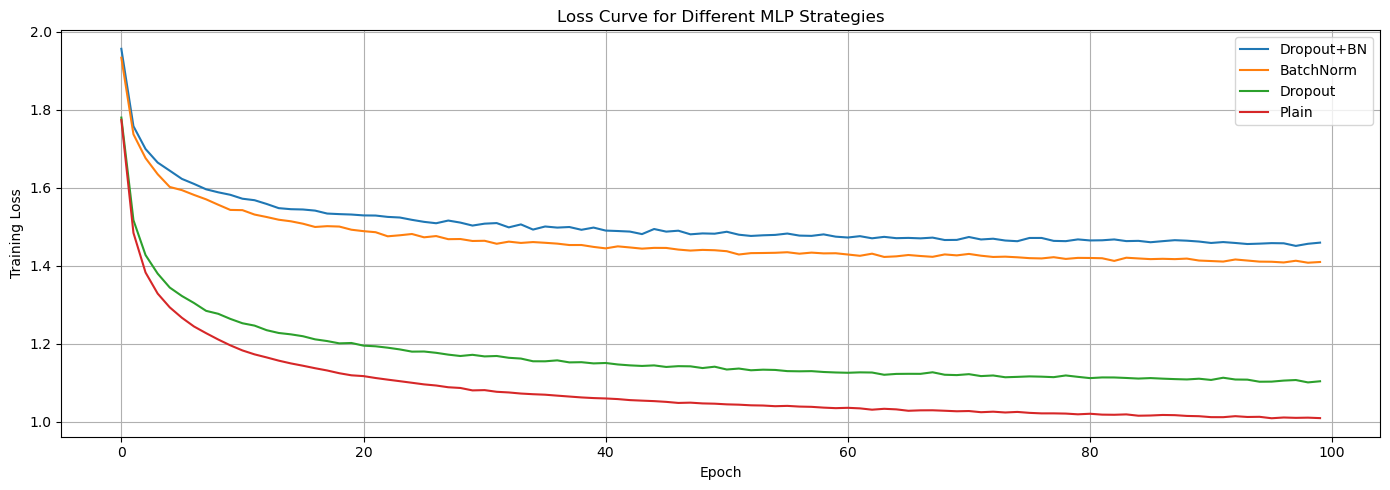

In [371]:
#Show the convergence trend of each model
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
for name, loss_curve in losses.items():
    plt.plot(loss_curve, label=name)

plt.title("Loss Curve for Different MLP Strategies")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
# calculate the confusion matrix
def compute_confusion_matrix(y_true, y_pred, num_classes=10):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[t, p] += 1
    return cm

def plot_confusion_matrix(cm, class_names=None, title="Confusion Matrix"):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(6, 5))
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if class_names:
        ax.set_xticks(np.arange(len(class_names)))
        ax.set_yticks(np.arange(len(class_names)))
        ax.set_xticklabels(class_names)
        ax.set_yticklabels(class_names)
        plt.xticks(rotation=45)

    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.title(title)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), va='center', ha='center', color='black')

    plt.tight_layout()
    plt.show()


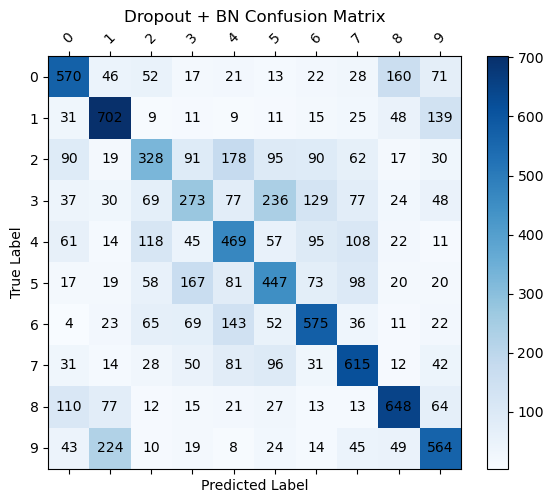

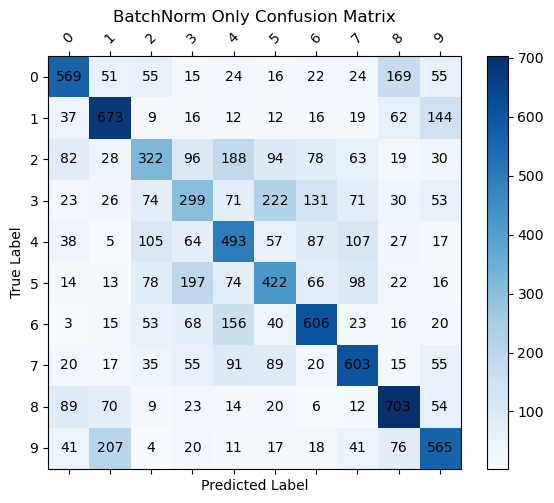

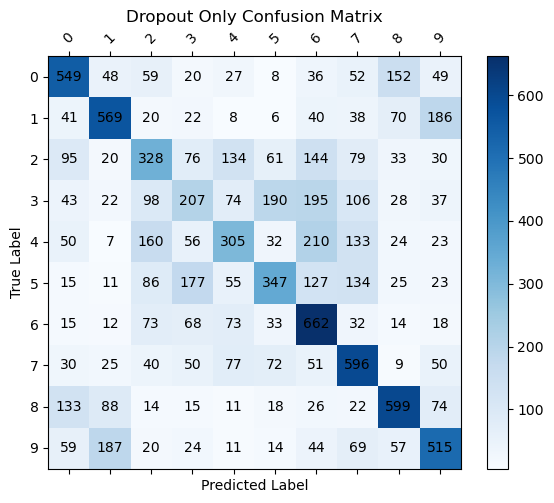

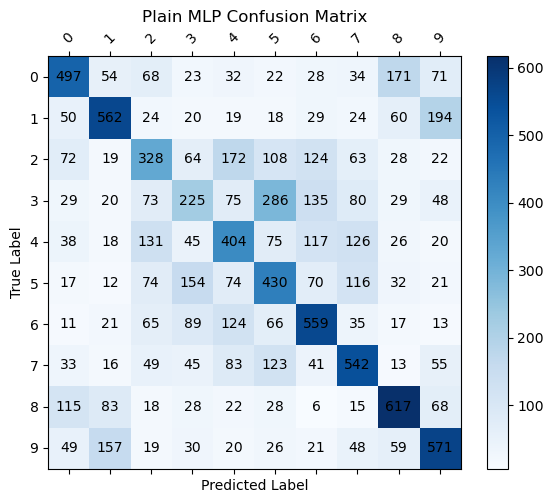

In [373]:
# convert if it is one-hot 
y_true = data.test_label
if y_true.ndim > 1:
    y_true = np.argmax(y_true, axis=1)

predictions = {
    "Dropout + BN": y_pred2,
    "BatchNorm Only": y_pred3,
    "Dropout Only": y_pred4,
    "Plain MLP": y_pred5
}

# Convert to integer prediction labels uniformly (in case they are probabilities or one-hot)
for name, y_pred in predictions.items():
    if y_pred.ndim > 1:
        y_pred = np.argmax(y_pred, axis=1)
    cm = compute_confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, class_names=[str(i) for i in range(10)], title=f"{name} Confusion Matrix")


In [374]:
# show the accuracy table
acc_dropout_bn = test_acc2 * 100
acc_bn_only = test_acc3 * 100
acc_dropout_only = test_acc4 * 100
acc_plain = test_acc5 * 100


print(f"{'Accuracy                   ':<15} | {'With Dropout':<12} | {'Without Dropout':<12}")
print("-" * 65)
print(f"{'With Batch Normalization   ':<15} | {acc_dropout_bn:>10.2f}% | {acc_bn_only:>10.2f}%")
print(f"{'Without Batch Normalization':<15} | {acc_dropout_only:>10.2f}% | {acc_plain:>10.2f}%")


Accuracy                    | With Dropout | Without Dropout
-----------------------------------------------------------------
With Batch Normalization    |      52.08% |      52.55%
Without Batch Normalization |      47.11% |      47.35%


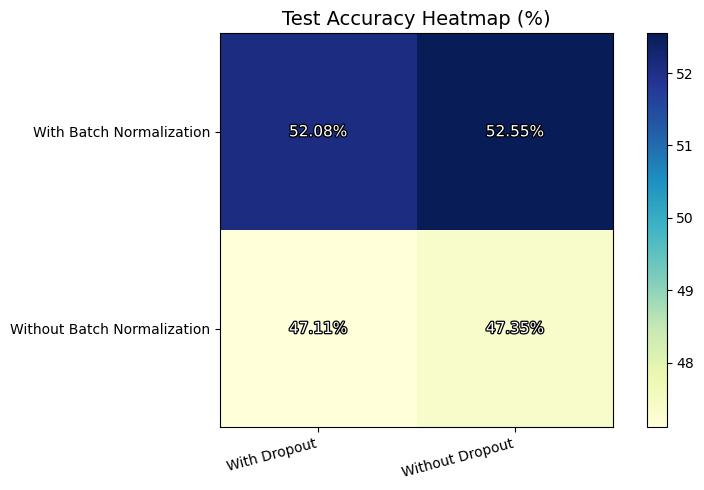

In [375]:
# draw the heatmap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects  

accuracy_matrix = np.array([
    [acc_dropout_bn, acc_bn_only],
    [acc_dropout_only, acc_plain]
])

row_labels = ["With Batch Normalization", "Without Batch Normalization"]
col_labels = ["With Dropout", "Without Dropout"]

fig, ax = plt.subplots(figsize=(8, 5))
im = ax.imshow(accuracy_matrix, cmap="YlGnBu")

ax.set_xticks(np.arange(len(col_labels)))
ax.set_yticks(np.arange(len(row_labels)))
ax.set_xticklabels(col_labels, fontsize=10)
ax.set_yticklabels(row_labels, fontsize=10)
plt.setp(ax.get_xticklabels(), rotation=15, ha="right")

for i in range(len(row_labels)):
    for j in range(len(col_labels)):
        value = accuracy_matrix[i, j]
        color = "white" if value > accuracy_matrix.max() * 0.85 else "black"
        text = ax.text(j, i, f"{value:.2f}%", ha="center", va="center",
                       color=color, fontsize=11)
        text.set_path_effects([path_effects.Stroke(linewidth=1.8, foreground='black'),
                               path_effects.Normal()])

ax.set_title("Test Accuracy Heatmap (%)", fontsize=14)
fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()
